## GPT-4 vs LLMProxy cost routing
This double bar graph is meant to visualize the difference in cost between using GPT-4 vs LLMProxy cost routing

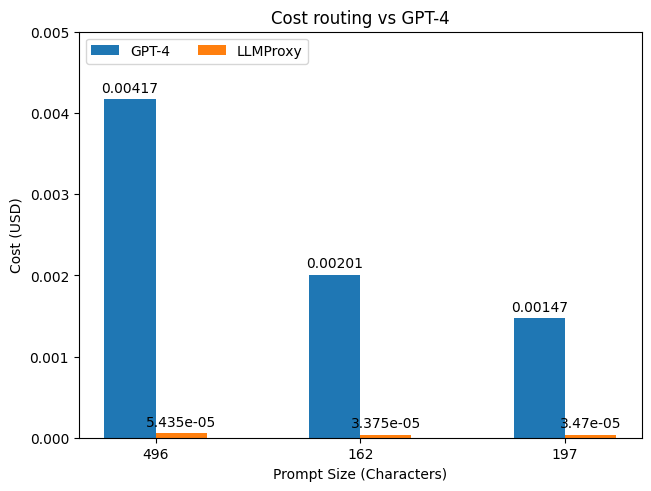

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('cost-vs-gpt.csv')

choices = ("gpt-4", "llmproxy")
data = {
    "GPT-4": df["openai_cost"].values,
    "LLMProxy": df["llmproxy_cost"].values,
}

x = np.arange(len(df))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost (USD)')
ax.set_ylim(0, max(max(measurement) for measurement in data.values()) * 1.2)
ax.set_title('Cost routing vs GPT-4')
ax.set_xlabel('Prompt Size (Characters)')
ax.set_xticks(x + 0.5 * width)
ax.set_xticklabels(df["prompt_size"].values)
ax.legend(loc='upper left', ncols=3)

plt.show()

## Average cost of GPT-4 vs LLMProxy cost routing
This bar graph is meant to visualize the average cost of using GPT-4 vs LLMProxy cost routing